##  UserCF编程实现

这里简单的通过编程实现上面的案例，为后面的大作业做一个热身， 梳理一下上面的过程其实就是三步： 计算用户相似性矩阵、得到前n个相似用户、计算最终得分。

In [3]:
import numpy as np
import pandas as pd

In [4]:
# 定义数据集， 也就是那个表格， 注意这里我们采用字典存放数据， 因为实际情况中数据是非常稀疏的， 很少有情况是现在这样
def loadData():
    items={'A': {1: 5, 2: 3, 3: 4, 4: 3, 5: 1},
           'B': {1: 3, 2: 1, 3: 3, 4: 3, 5: 5},
           'C': {1: 4, 2: 2, 3: 4, 4: 1, 5: 5},
           'D': {1: 4, 2: 3, 3: 3, 4: 5, 5: 2},
           'E': {2: 3, 3: 5, 4: 4, 5: 1}
          }
    users={1: {'A': 5, 'B': 3, 'C': 4, 'D': 4},
           2: {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 3},
           3: {'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 5},
           4: {'A': 3, 'B': 3, 'C': 1, 'D': 5, 'E': 4},
           5: {'A': 1, 'B': 5, 'C': 5, 'D': 2, 'E': 1}
          }
    return items,users

items, users = loadData()
item_df = pd.DataFrame(items).T
user_df = pd.DataFrame(users).T

In [6]:
user_df

,A,B,C,D,E
1,5.0,3.0,4.0,4.0,NaN
2,3.0,1.0,2.0,3.0,3.0
3,4.0,3.0,4.0,3.0,5.0
4,3.0,3.0,1.0,5.0,4.0
5,1.0,5.0,5.0,2.0,1.0


In [64]:
user_test = user_df.T
user_test

,1,2,3,4,5
A,5.0,3.0,4.0,3.0,1.0
B,3.0,1.0,3.0,3.0,5.0
C,4.0,2.0,4.0,1.0,5.0
D,4.0,3.0,3.0,5.0,2.0
E,NaN,3.0,5.0,4.0,1.0


###  DataFrame.corr()  和 np.corrcoef()  比较

np.corrcoef()  对 Nan值容忍度很低，处理或者计算不了 Nan值

In [65]:
user_df
a = user_df.loc[1]
b = user_df.loc[2]
# a,b
np.corrcoef(a,b,rowvar=True)

array([[nan, nan],
       [nan,  1.]])

DataFrame.corr() 方法对DataFrame每两列数据，使用 np.corrcoef()方法，可以处理Nan值

In [69]:
# 计算用户相似性矩阵
similarity_matrix = user_test.corr()
similarity_matrix

,1,2,3,4,5
1,1.000000,0.852803,0.707107,0.000000,-0.792118
2,0.852803,1.000000,0.467707,0.489956,-0.900149
3,0.707107,0.467707,1.000000,-0.161165,-0.466569
4,0.000000,0.489956,-0.161165,1.000000,-0.641503
5,-0.792118,-0.900149,-0.466569,-0.641503,1.000000


In [75]:
"""计算前n个相似的用户"""
# 注意，排除自身的相关系数，为 1
n = 3
similarity_users = similarity_matrix[1].sort_values(ascending=False)[1:n].index.tolist()    # [2, 3]   也就是用户1和用户2
similarity_users

[2, 3]

In [92]:
user_df

,A,B,C,D,E
1,5.0,3.0,4.0,4.0,NaN
2,3.0,1.0,2.0,3.0,3.0
3,4.0,3.0,4.0,3.0,5.0
4,3.0,3.0,1.0,5.0,4.0
5,1.0,5.0,5.0,2.0,1.0


In [107]:
# 计算最终结果值
# base_score  = user_df.mean(axis=1).loc[similarity_users].values.tolist() 
corr_value  = similarity_matrix[1].sort_values(ascending=False)[1:n].tolist() 

weighted_scores = 0
for user in similarity_users:
    corr_values_sum  = sum(corr_value)
    weighted_scores  += similarity_matrix[1][user] * (user_df['E'][user] - user_df.mean(axis=1)[user] )
final_scores  = user_df.mean(axis=1)[1] + weighted_scores / corr_values_sum
final_scores

4.871979899370592

In [109]:
user_df.loc[1]['E'] = final_scores
user_df

,A,B,C,D,E
1,5.0,3.0,4.0,4.0,4.87198
2,3.0,1.0,2.0,3.0,3.00000
3,4.0,3.0,4.0,3.0,5.00000
4,3.0,3.0,1.0,5.0,4.00000
5,1.0,5.0,5.0,2.0,1.00000


###  结论：给用户 1 推荐 A 物品 和 E 物品

## itemCF 

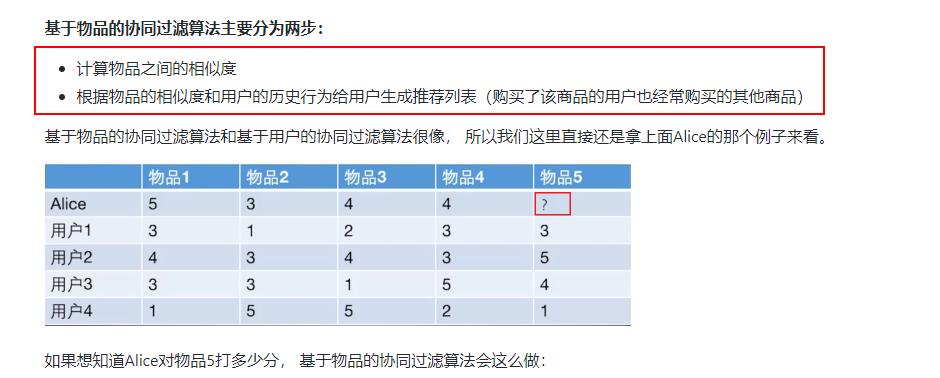

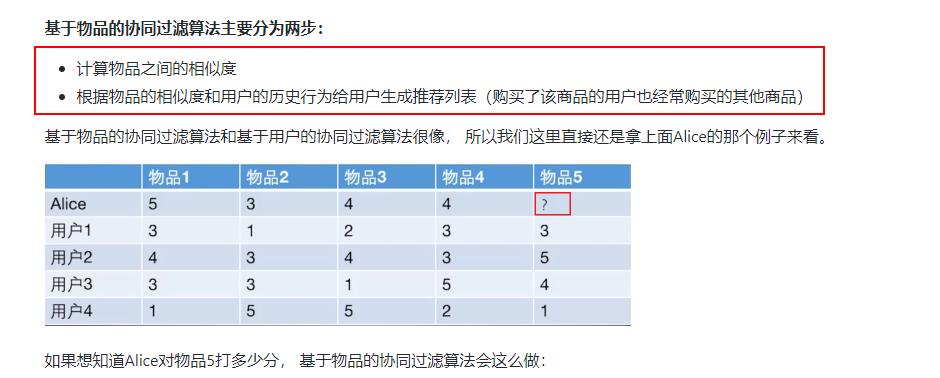

In [111]:
item_df = item_df.T
item_df

,A,B,C,D,E
1,5.0,3.0,4.0,4.0,NaN
2,3.0,1.0,2.0,3.0,3.0
3,4.0,3.0,4.0,3.0,5.0
4,3.0,3.0,1.0,5.0,4.0
5,1.0,5.0,5.0,2.0,1.0


In [113]:
similarity_matrix_items = item_df.corr()
similarity_matrix_items

,A,B,C,D,E
A,1.000000,-0.476731,-0.123091,0.532181,0.969458
B,-0.476731,1.000000,0.645497,-0.310087,-0.478091
C,-0.123091,0.645497,1.000000,-0.720577,-0.427618
D,0.532181,-0.310087,-0.720577,1.000000,0.581675
E,0.969458,-0.478091,-0.427618,0.581675,1.000000


In [116]:
"""计算前n个相似的物品"""
# 注意，排除自身的相关系数，为 1
n = 3
similarity_users = similarity_matrix_items['E'].sort_values(ascending=False)[1:n].index.tolist()    # [2, 3]   也就是用户1和用户2
similarity_users

['A', 'D']

In [129]:
# 计算最终结果值
# base_score  = user_df.mean(axis=1).loc[similarity_users].values.tolist() 
corr_value  = similarity_matrix_items['E'].sort_values(ascending=False)[1:n].tolist() 

weighted_scores = 0
for user in similarity_users:
    corr_values_sum  = sum(corr_value)
    weighted_scores  += similarity_matrix_items['E'][user] * (item_df.loc[1][user] - item_df.mean(axis=1)[1] )
final_scores  = item_df.mean(axis=1)[1] + weighted_scores / corr_values_sum
final_scores

4.625

In [127]:
item_df

,A,B,C,D,E
1,5.0,3.0,4.0,4.0,NaN
2,3.0,1.0,2.0,3.0,3.0
3,4.0,3.0,4.0,3.0,5.0
4,3.0,3.0,1.0,5.0,4.0
5,1.0,5.0,5.0,2.0,1.0


In [131]:
item_df['E'][1] = final_scores
item_df

,A,B,C,D,E
1,5.0,3.0,4.0,4.0,4.625
2,3.0,1.0,2.0,3.0,3.000
3,4.0,3.0,4.0,3.0,5.000
4,3.0,3.0,1.0,5.0,4.000
5,1.0,5.0,5.0,2.0,1.000


###  结论：给用户 1 推荐 A 物品 和 E 物品

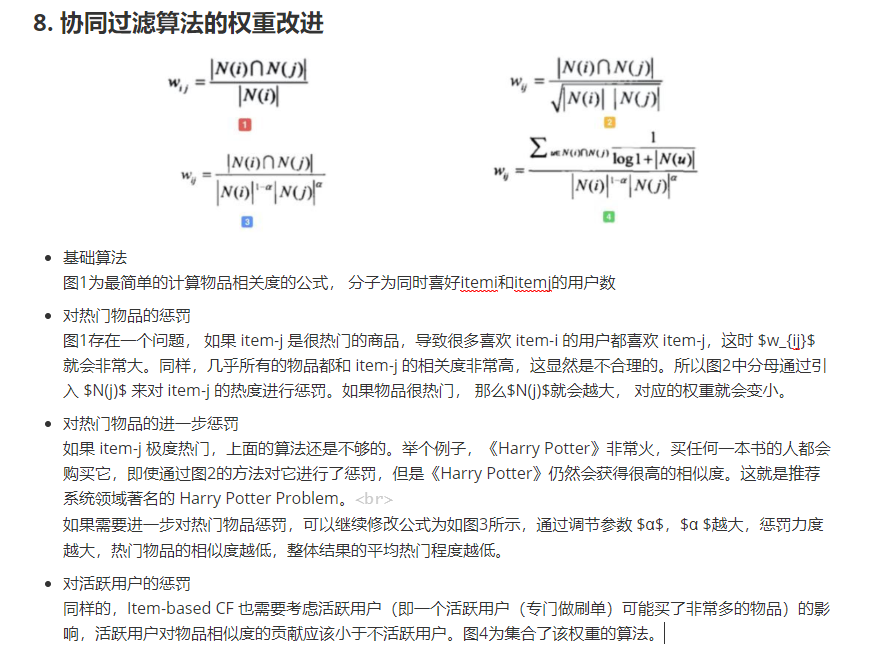

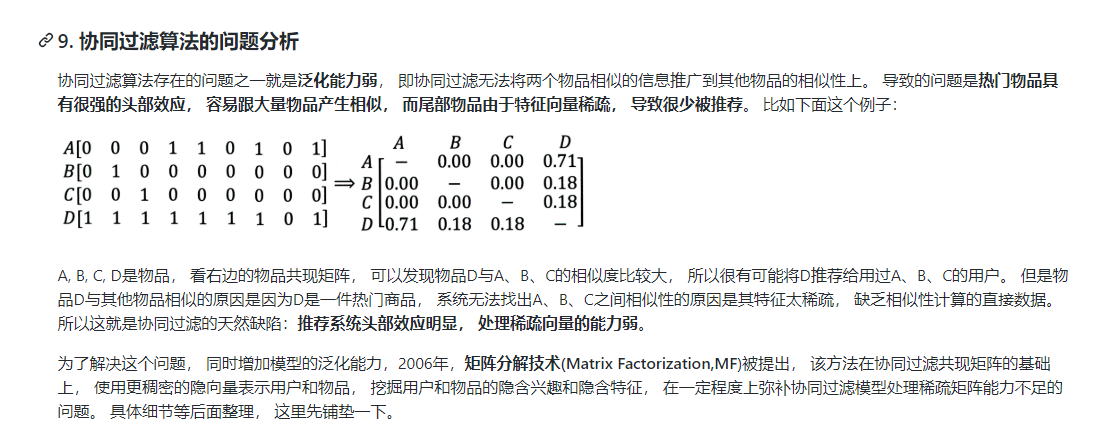

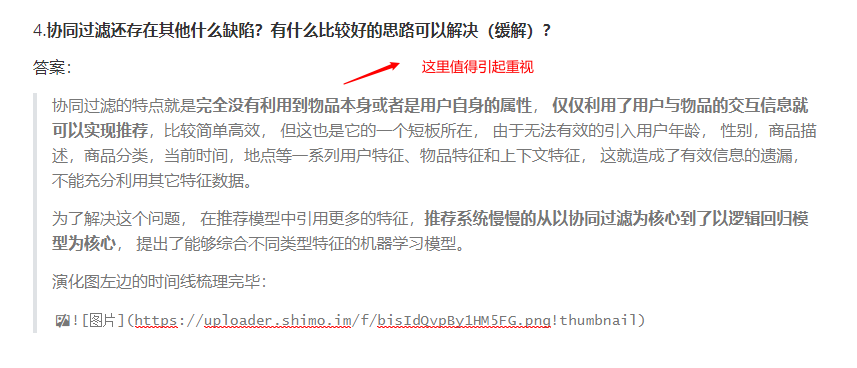